![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [35]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [36]:
insurance.info()
insurance.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


(1338, 7)

## Task No.1 // Clean the data
### -- Are there any missing values
### -- Standarize categories in region 
### -- Standarize charges datatype
### -- standarize age column

In [37]:
insurance_filled = insurance.dropna()
insurance_filled['region'] =  insurance_filled['region'].str.lower()
insurance_filled['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [38]:
insurance_filled['sex'] =insurance_filled['sex'].replace({'woman':'female', 'M':'male','F':'female', 'man':'male'})
insurance_filled['sex'].unique()

array(['female', 'male'], dtype=object)

In [39]:
insurance_filled['charges']= insurance_filled['charges'].replace({'\$': ''}, regex=True).astype(float)
insurance_filled['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [40]:
insurance_filled = insurance_filled[insurance_filled['age']>0]
insurance_filled.loc[insurance_filled['children'] < 0, 'children'] = 0

## task 2 : scatter plot between variables and charges

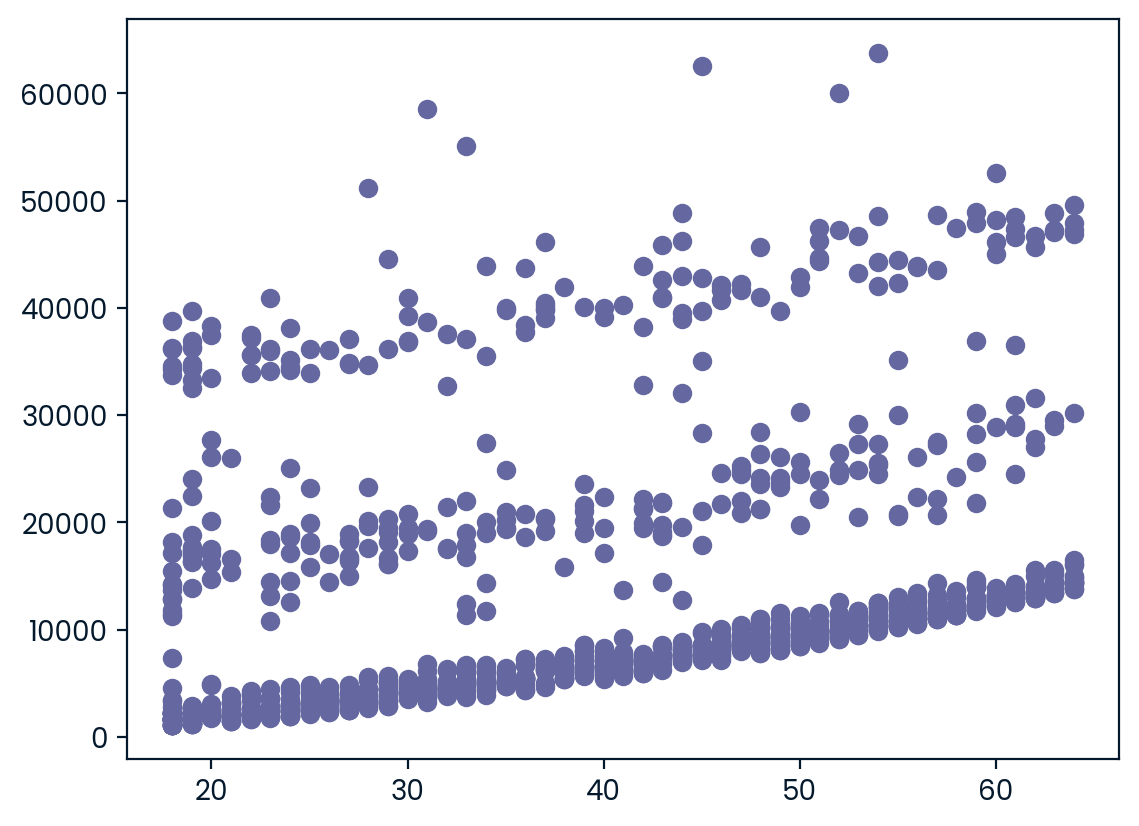

In [41]:
import matplotlib.pyplot as plt 
df = insurance_filled.copy()
plt.scatter(df['age'], df['charges'])
plt.show()

## Task 3 // prepare the data for a model fitting 

In [42]:
df['smoker'] = df['smoker'].astype('category')
df['sex'] = df['sex'].astype('category')
df['region'] = df['region'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1149 non-null   float64 
 1   sex       1149 non-null   category
 2   bmi       1149 non-null   float64 
 3   children  1149 non-null   float64 
 4   smoker    1149 non-null   category
 5   region    1149 non-null   category
 6   charges   1149 non-null   float64 
dtypes: category(3), float64(4)
memory usage: 48.7 KB


In [43]:
df['age'].unique()

array([19., 18., 28., 33., 32., 46., 37., 60., 25., 62., 23., 56., 52.,
       30., 59., 63., 55., 31., 22., 26., 35., 24., 41., 48., 36., 40.,
       58., 34., 43., 64., 20., 61., 27., 53., 44., 57., 21., 45., 54.,
       38., 29., 49., 47., 51., 42., 50., 39.])

In [44]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale numerical variables
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Check the processed data
print(X.head())

        age       bmi  ...  region_southeast  region_southwest
0 -1.427171 -0.439874  ...                 0                 1
1 -1.497807  0.519066  ...                 1                 0
2 -0.791445  0.393276  ...                 1                 0
3 -0.438264 -1.288543  ...                 0                 0
4 -0.508900 -0.279778  ...                 0                 0

[5 rows x 8 columns]


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define the model
insurance_model = LinearRegression()

# Evaluate the model using cross_val_score
r2_scores = cross_val_score(insurance_model, X, y, cv=5, scoring='r2')

# Calculate the mean R² score
r2_score = r2_scores.mean()

# Display the R² score
print(f"R² Scores for each fold: {r2_scores}")
print(f"Mean R² Score: {r2_score:.4f}")

# Check if the R² score meets the threshold
if r2_score >= 0.65:
    print("The model's performance is satisfactory (R² >= 0.65).")
else:
    print("The model's performance is below the expected threshold (R² < 0.65).")


R² Scores for each fold: [0.73716325 0.71037951 0.80334153 0.71659867 0.75777278]
Mean R² Score: 0.7451
The model's performance is satisfactory (R² >= 0.65).


In [46]:
validation_data = pd.read_csv('validation_dataset.csv')
validation_data.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [47]:

# Encode categorical variables to match training data
validation_data = pd.get_dummies(validation_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Ensure the validation data has the same columns as the training data
missing_cols = set(X.columns) - set(validation_data.columns)
for col in missing_cols:
    validation_data[col] = 0  # Add missing columns with 0
validation_data = validation_data[X.columns]  # Ensure column order matches

# Standardize numerical columns
scaler = StandardScaler()
validation_data[['age', 'bmi', 'children']] = scaler.fit_transform(validation_data[['age', 'bmi', 'children']])

# Train the model (example)
insurance_model = LinearRegression()
insurance_model.fit(X, y)

# Predict charges
validation_data['predicted_charges'] = insurance_model.predict(validation_data)

# Ensure all predictions are realistic
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

# Display validation data with predictions
print(validation_data)

         age       bmi  ...  region_southwest  predicted_charges
0  -1.342765 -0.880452  ...                 0        1255.405000
1  -0.364345 -0.748241  ...                 0       29588.117779
2  -0.923442 -0.592095  ...                 0       27077.976556
3   1.126581  1.479524  ...                 0       40306.211530
4  -0.876851 -0.084336  ...                 0        4283.061597
5   1.079990  1.904435  ...                 0       40949.213877
6  -0.830260 -0.423412  ...                 0        4656.474112
7  -0.224571  0.101728  ...                 0        8125.941912
8   0.054978 -0.168963  ...                 0        8229.160532
9   0.753850 -0.335082  ...                 0       10170.717713
10 -0.923442 -1.175933  ...                 0        3003.816526
11  0.194752 -0.163549  ...                 0        8983.483690
12  0.614075 -0.855378  ...                 0        8458.408365
13  0.474301 -0.617740  ...                 1        8308.547590
14 -1.249583 -0.602068  .